<a href="https://colab.research.google.com/github/alfinazakya/Data-Science/blob/main/Tugas%20EDA-Alfina%20Zakya%20Ula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [48]:
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin1')
df = df.drop(index=574)  # Drop corrupted row
df['streams'] = df['streams'].str.replace(',', '').astype(int)
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '').astype(int)
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '').astype(float)

In [49]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [50]:
df.shape

(952, 24)

In [51]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [52]:
df['mode'].value_counts()
df['key'].value_counts()

,count
key,
C#,120
G,96
G#,91
F,89
B,81
D,81
A,74
F#,73
E,62


In [53]:
df['mode'].value_counts() / len(df) * 100

,count
mode,
Major,57.668067
Minor,42.331933


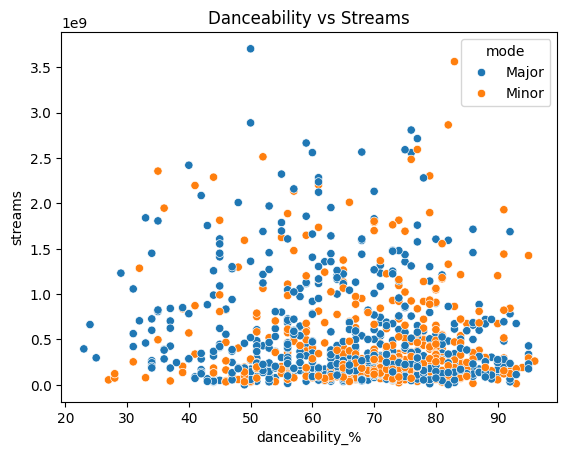

In [54]:
sns.scatterplot(data=df, x='danceability_%', y='streams', hue='mode')
plt.title('Danceability vs Streams')
plt.show()

In [55]:
avg_streams_by_key = df.groupby('key')['streams'].mean().reset_index()
fig = px.bar(avg_streams_by_key, x='key', y='streams', title='Rata-rata Streams per Musical Key')
fig.show()

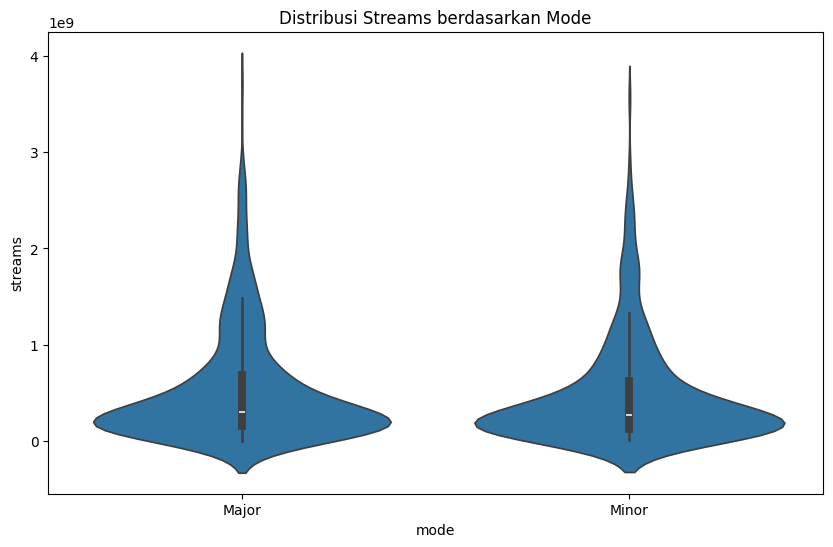

In [56]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='mode', y='streams', data=df)
plt.title('Distribusi Streams berdasarkan Mode')
plt.show()

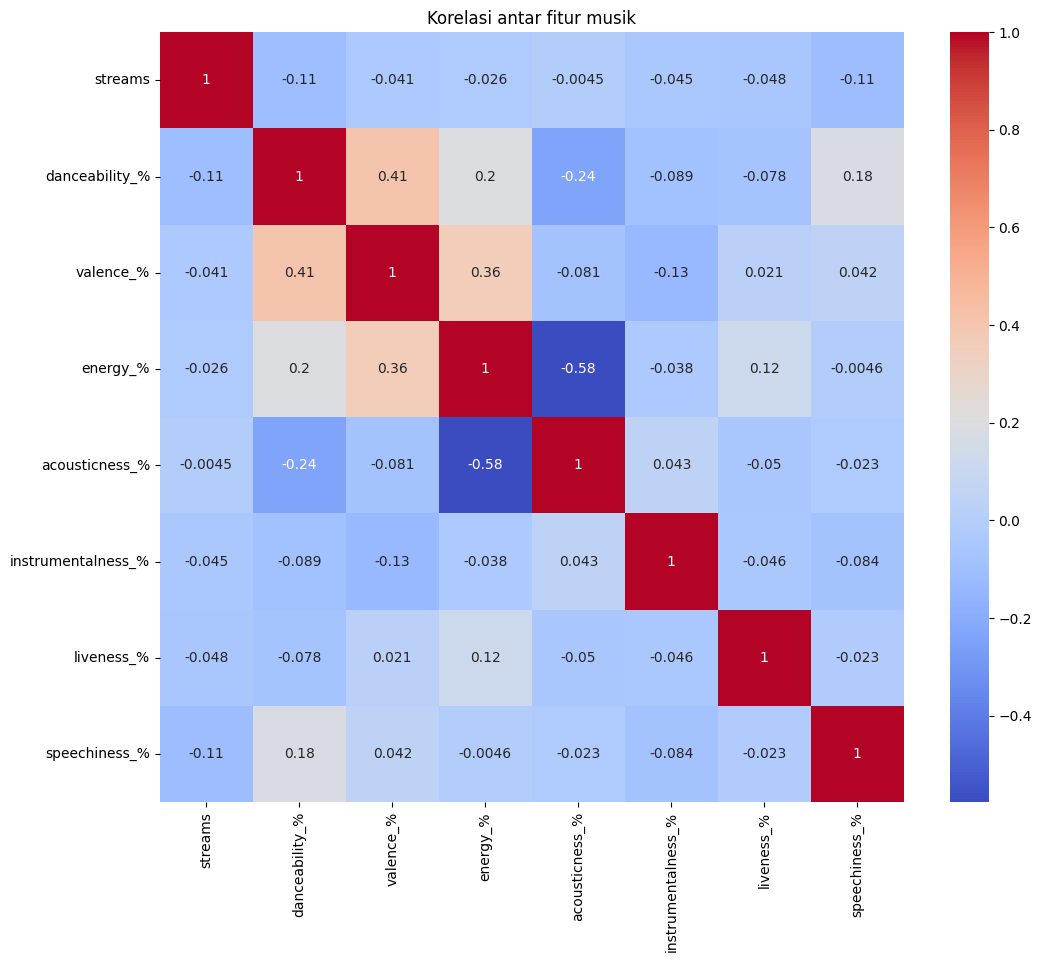

In [57]:
plt.figure(figsize=(12, 10))
corr = df[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
           'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur musik')
plt.show()

Dari visualisasi diagram tersebut, didapatkan insight sebagai berikut:
1. Distribusi Jumlah Streams
Distribusi sangat tidak merata (right-skewed): Sebagian besar lagu memiliki jumlah streams yang relatif rendah, sementara hanya sedikit lagu yang mencapai jutaan streams.
Menunjukkan adanya fenomena “winner takes all” di industri musik—hanya sedikit lagu yang menjadi sangat viral.

2. Scatter Plot: Danceability vs. Streams
Tidak ada korelasi kuat secara linear antara danceability dengan jumlah streams.
Namun, lagu dengan danceability tinggi cenderung berada di spektrum atas untuk jumlah streams.
Mode "Major" tampaknya sedikit lebih mendominasi pada lagu dengan streams tinggi, walau tidak signifikan.

3. Bar Plot: Rata-rata Streams per Musical Key
Beberapa key musikal seperti C♯, A, dan D♯ memiliki rata-rata streams yang lebih tinggi dibanding lainnya.
Bisa jadi ini hanya kebetulan atau karena beberapa lagu populer berada dalam key tersebut—tidak serta merta menunjukkan preferensi pendengar.

4. Violin Plot: Distribusi Streams berdasarkan Mode
Lagu dengan Mode "Major" memiliki distribusi streams yang lebih lebar dan mencakup nilai tinggi.
Sementara Mode "Minor" cenderung lebih terkonsentrasi pada nilai rendah hingga menengah.
Hal ini mendukung temuan umum bahwa lagu-lagu ber-mode "Major" (nuansa lebih ceria) lebih disukai secara luas.

5. Heatmap Korelasi Antar Fitur Musik
Streams memiliki korelasi positif lemah dengan:
valence_% (keceriaan lagu)
danceability_% dan energy_%
Korelasi negatif terlihat dengan:
acousticness_% → menunjukkan bahwa lagu akustik cenderung kurang populer.
Instrumentalness juga tidak berkorelasi positif terhadap popularitas, memperkuat bahwa lagu dengan vokal lebih disukai di pasar umum.



